# Prática 01 – Análise de Notas de Alunos

## Objetivo
Praticar tipos de dados, listas, dicionários e funções para análise de dados acadêmicos.

## Dataset
`datasets/alunos_notas.csv`

**Colunas:** Nome, Matricula, Disciplina, Nota1, Nota2, Nota3, Nota4, Frequencia

## Referências do Curso
- **Notebook:** `Programacao_Intensiva_Ciencia_de_Dados.ipynb`
  - Seção 1.1 – Tipos de Dados e Operações Básicas (operações aritméticas para cálculo de médias)
  - Seção 1.2 – Estruturas de Dados Fundamentais (listas para armazenar notas, dicionários para perfil do aluno)
  - Seção 1.5 – Funções Avançadas (função `calcular_estatisticas` como referência)
- **Documentação:** `documentacao_completa.md`
  - Seção 2.2 – Estruturas de Dados Fundamentais (listas, dicionários)
  - Seção 2.3 – Funções (estrutura, argumentos padrão, docstrings)



## Tarefas

### Nível Básico
1. Ler o arquivo CSV e armazenar os dados em uma lista de dicionários (sem usar pandas)
2. Calcular a média das 4 notas de cada aluno
3. Criar uma lista com os nomes dos alunos aprovados (média >= 7.0 E frequência >= 75%)
4. Contar quantos alunos foram reprovados por nota e quantos por frequência


In [32]:
with open("datasets/alunos_notas.csv", "r", encoding='utf-8') as f:
    next(f)  # pula o cabeçalho
    aprovados: list[str] = []
    reprovados: list[str] = []
    reprovado_por_nota = 0
    reprovados_por_frequencia = 0
    for i, linha in enumerate(f, start=1):
        partes = linha.strip().split(',')
        nome = partes[0]
        # converte diretamente as notas
        nota1, nota2, nota3, nota4 = map(float, partes[3:7])
        media = (nota1 + nota2 + nota3 + nota4) / 4
        frequencia = int(partes[7])

        if media >= 7 and frequencia >= 75:
            aprovados.append(nome)
        else:
            if media < 7:
                reprovado_por_nota += 1
            if frequencia < 75:
                reprovados_por_frequencia += 1
            reprovados.append(nome)

    print(f"Aprovados: {aprovados}")
    print(f"Reprovados: {reprovados}")
    print(f"Total de alunos reprovados por nota: {reprovado_por_nota}")
    print(f"Total de alunos reprovados por frequência: {reprovados_por_frequencia}")

Aprovados: ['Leticia Andrade', 'Alexandre Ribeiro', 'Gabriela Nunes']
Reprovados: ['Maria Barbosa', 'Gabriel Lima', 'Leandro Reis', 'Carla Costa', 'Felipe Mendes', 'Juliana Martins', 'Paulo Gomes', 'Isabela Oliveira', 'Arthur Vieira', 'Lorena Vieira', 'Andre Dias', 'Ana Ferreira', 'Marcos Lopes', 'Roberto Nascimento', 'Priscila Rocha', 'Livia Rodrigues', 'Patricia Moreira', 'Enzo Martins', 'Camila Lopes', 'Tatiana Campos', 'Gustavo Souza', 'Rodrigo Andrade', 'Beatriz Rocha', 'Thiago Barros', 'Heitor Nascimento', 'Samuel Rocha', 'Bruna Monteiro', 'Ana Andrade', 'Tatiana Correia', 'Clara Moreira', 'Fernando Moura', 'Fabio Barbosa', 'Bianca Ramos', 'Amanda Dias', 'Leonardo Costa', 'Raquel Nascimento', 'Eduardo Martins']
Total de alunos reprovados por nota: 36
Total de alunos reprovados por frequência: 21


### Nível Intermediário
5. Criar uma função `calcular_situacao(nota1, nota2, nota3, nota4, frequencia)` que retorne "Aprovado", "Reprovado por Nota", "Reprovado por Frequência" ou "Reprovado por Nota e Frequência"
6. Usando list comprehension, criar uma lista de tuplas (nome, media) apenas dos alunos com média acima de 8.0
7. Criar um dicionário onde a chave é a disciplina e o valor é a média geral daquela disciplina
8. Encontrar o aluno com a maior e a menor média geral

In [36]:
def calcular_situacao(nota1: float,
                      nota2: float,
                      nota3: float,
                      nota4: float,
                      frequencia: float) -> tuple[str, float]:



    media = (nota1 + nota2 + nota3 + nota4) / 4



    if media >= 7 and frequencia >= 75:
        return "Aprovado", media
    elif media < 7:
        return "Reprovado por Nota", media
    else:
        return "Reprovado por Frequência", media

In [62]:
with open("datasets/alunos_notas.csv", "r", encoding='utf-8') as f:
    next(f)  # pula o cabeçalho
    aprovados: list[str] = []
    reprovados: list[str] = []
    reprovado_por_nota = 0
    reprovados_por_frequencia = 0

    disciplinas: dict[str, list[float]] = {}

    maior_media = -1
    menor_media = 11  # notas vão até 10

    aluno_maior = ""
    aluno_menor = ""

    # lista de tuples (nome, média) dos aprovados com média >= 8
    aprovado_acima_de_8: list[tuple[str, float]] = []
    for i, linha in enumerate(f, start=1):
        partes = linha.strip().split(',')
        nome = partes[0]
        disciplina = str(partes[2])
        nota1, nota2, nota3, nota4 = map(float, partes[3:7])
        frequencia = int(partes[7])

        situacao, media = calcular_situacao(nota1, nota2, nota3, nota4, frequencia)

        if media > maior_media:
            maior_media = media
            aluno_maior = nome

        if media < menor_media:
            menor_media = media
            aluno_menor = nome

        if situacao == "Aprovado":
            aprovados.append(nome)

            aprovado_acima_de_8 = [(nome, media) for nome, media in zip(aprovados, [m for _, m in aprovado_acima_de_8])]
        else:
            if situacao == "Reprovado por Nota":
                reprovado_por_nota += 1
            elif situacao == "Reprovado por Frequência":
                reprovados_por_frequencia += 1
            reprovados.append(nome)

        # Cria as dicliplinas no dicionario
        if disciplina not in disciplinas:
            disciplinas[disciplina] = []

        disciplinas[disciplina].append(media)

# média geral por disciplina
media_geral = {}
for disc, medias in disciplinas.items():
    media_geral[disc] = round(sum(medias) / len(medias), 2)

print(f"Aprovados: {aprovados}")
print(f"Reprovados: {reprovados}")
print(f"Total de alunos reprovados por nota: {reprovado_por_nota}")
print(f"Total de alunos reprovados por frequência: {reprovados_por_frequencia}")
print(f"Aprovados com média >= 8: {aprovado_acima_de_8}")

print(f"Média geral por disciplina: {media_geral}")

print("Maior média:", aluno_maior, maior_media)
print("Menor média:", aluno_menor, menor_media)

Aprovados: ['Leticia Andrade', 'Alexandre Ribeiro', 'Gabriela Nunes']
Reprovados: ['Maria Barbosa', 'Gabriel Lima', 'Leandro Reis', 'Carla Costa', 'Felipe Mendes', 'Juliana Martins', 'Paulo Gomes', 'Isabela Oliveira', 'Arthur Vieira', 'Lorena Vieira', 'Andre Dias', 'Ana Ferreira', 'Marcos Lopes', 'Roberto Nascimento', 'Priscila Rocha', 'Livia Rodrigues', 'Patricia Moreira', 'Enzo Martins', 'Camila Lopes', 'Tatiana Campos', 'Gustavo Souza', 'Rodrigo Andrade', 'Beatriz Rocha', 'Thiago Barros', 'Heitor Nascimento', 'Samuel Rocha', 'Bruna Monteiro', 'Ana Andrade', 'Tatiana Correia', 'Clara Moreira', 'Fernando Moura', 'Fabio Barbosa', 'Bianca Ramos', 'Amanda Dias', 'Leonardo Costa', 'Raquel Nascimento', 'Eduardo Martins']
Total de alunos reprovados por nota: 36
Total de alunos reprovados por frequência: 1
Aprovados com média >= 8: []
Média geral por disciplina: {'Portugues': 4.63, 'Matematica': 4.97, 'Ciencias': 5.17, 'Ingles': 4.9, 'Historia': 5.02}
Maior média: Alexandre Ribeiro 7.35
Meno

### Nível Avançado
9. Criar uma função `relatorio_turma(dados, disciplina)` que receba os dados e o nome de uma disciplina e retorne um dicionário com: média da turma, maior nota, menor nota, quantidade de aprovados, quantidade de reprovados
10. Usar `map` e `lambda` para criar uma lista com as médias de todos os alunos
11. Usar `filter` para obter apenas os registros de uma disciplina específica
12. Gerar um arquivo de texto `resultado_alunos.txt` com o nome, média e situação de cada aluno

In [ ]:
def relatorio_turma(dados, disciplina):
    # Implementação da função para gerar relatório por disciplina
    pass

In [ ]:
with open("datasets/alunos_notas.csv", "r", encoding='utf-8') as f:
    next(f)  # pula o cabeçalho
    aprovados: list[str] = []
    reprovados: list[str] = []
    reprovado_por_nota = 0
    reprovados_por_frequencia = 0

    disciplinas: dict[str, list[float]] = {}

    maior_media = -1
    menor_media = 11  # notas vão até 10

    aluno_maior = ""
    aluno_menor = ""

    # lista de tuples (nome, média) dos aprovados com média >= 8
    aprovador_acima_de_8: list[tuple[str, float]] = []
    for i, linha in enumerate(f, start=1):
        partes = linha.strip().split(',')
        nome = partes[0]
        disciplina = str(partes[2])
        nota1, nota2, nota3, nota4 = map(float, partes[3:7])
        frequencia = int(partes[7])

        situacao, media = calcular_situacao(nota1, nota2, nota3, nota4, frequencia)

        if media > maior_media:
            maior_media = media
            aluno_maior = nome

        if media < menor_media:
            menor_media = media
            aluno_menor = nome

        if situacao == "Aprovado":
            aprovados.append(nome)

            if media >= 8:
                aprovador_acima_de_8.append((nome, media))
        else:
            if situacao == "Reprovado por Nota":
                reprovado_por_nota += 1
            elif situacao == "Reprovado por Frequência":
                reprovados_por_frequencia += 1
            reprovados.append(nome)

        # Cria as dicliplinas no dicionario
        if disciplina not in disciplinas:
            disciplinas[disciplina] = []

        disciplinas[disciplina].append(media)

# média geral por disciplina
media_geral = {}
for disc, medias in disciplinas.items():
    media_geral[disc] = round(sum(medias) / len(medias), 2)

print(f"Aprovados: {aprovados}")
print(f"Reprovados: {reprovados}")
print(f"Total de alunos reprovados por nota: {reprovado_por_nota}")
print(f"Total de alunos reprovados por frequência: {reprovados_por_frequencia}")
print(f"Aprovados com média >= 8: {aprovador_acima_de_8}")

print(f"Média geral por disciplina: {media_geral}")

print("Maior média:", aluno_maior, maior_media)
print("Menor média:", aluno_menor, menor_media)

In [ ]:
print("atualizando")

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

db = pd.read_csv("datasets/alunos_notas.csv")

In [47]:
db.head()

,Nome,Matricula,Disciplina,Nota1,Nota2,Nota3,Nota4,Frequencia
0,Maria Barbosa,202442098,Portugues,1.4,1.0,7.4,5.5,87
1,Gabriel Lima,202438657,Portugues,5.1,0.3,2.0,6.5,84
2,Leandro Reis,202446463,Matematica,7.6,1.6,4.2,2.8,63
3,Carla Costa,202422156,Ciencias,1.0,8.5,6.0,8.1,96
4,Felipe Mendes,202420328,Ingles,2.9,6.3,8.9,3.6,62


In [48]:
db.describe()

,Matricula,Nota1,Nota2,Nota3,Nota4,Frequencia
count,4.000000e+01,40.00000,40.000000,40.000000,40.000000,40.000000
mean,2.024501e+08,5.30000,4.822500,4.692500,4.855000,76.700000
std,2.724396e+04,3.22196,3.091717,2.878424,2.744313,13.956342
min,2.024113e+08,0.10000,0.300000,0.600000,0.500000,52.000000
25%,2.024268e+08,2.85000,1.675000,2.175000,2.650000,65.000000
50%,2.024446e+08,4.65000,5.400000,4.450000,5.400000,73.500000
75%,2.024649e+08,8.62500,7.250000,6.800000,6.800000,87.000000
max,2.024994e+08,10.00000,9.600000,10.000000,9.800000,99.000000


In [50]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

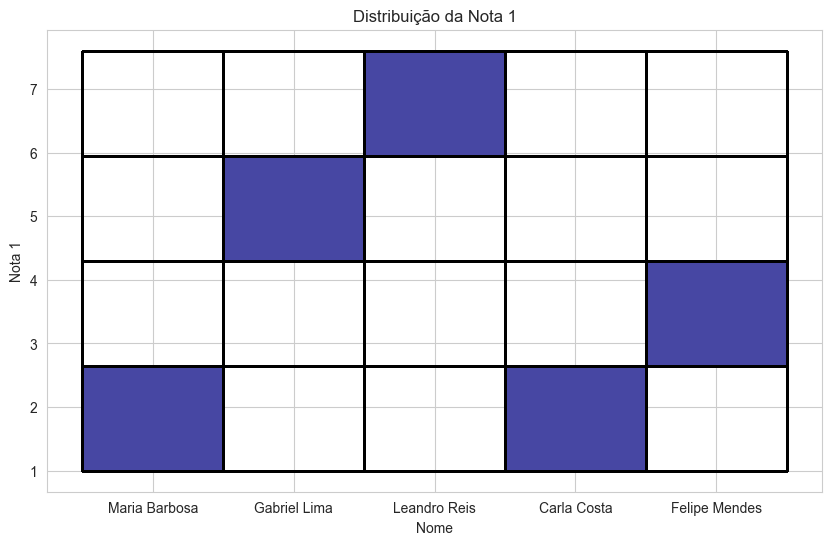

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(x=db['Nome'][:5], y=db['Nota1'][:5], color='blue', edgecolor='black')
plt.title('Distribuição da Nota 1')
plt.xlabel('Nome')
plt.ylabel('Nota 1')
plt.show()